# Scraped Positions API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedPositionsAPI/Scraped%20Positions%20API%20Example.ipynb)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Positions API

The goal of Scraped Positions API is to collect and return scraped positions by the given filters or position IDs. This can be done by using the `ScrapedPositionsAPI` class and calling appropriate methods

#### 1. Request by filters

Positions can be retrieved for specific filters, by calling the `get_positions` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`imos` List of IMOs

`received_date_from` Earliest date the position received

`received_date_to` Latest date the position received

`updated_date_from` Earliest date the position updated

`updated_date_to` Latest date the position updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format


#### 2. Request by position IDs

Positions can be retrieved for specific position IDs, by calling the `get_positions_by_position_ids` method with the following argument:

#### Required

`position_ids` A list of position ids to retrieve

### Additional optional arguments

Both methods, also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_vessel_name, scraped_deadweight, scraped_year_built, scraped_open_date, scraped_open_port, scraped_commercial_operator, scraped_cargo_type, scraped_last_cargo_types
```

`include_vessel_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
vessel_name, deadweight, year_built, liquid_capacity, vessel_type_id, vessel_type, vessel_class
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
open_name, open_taxonomy, commercial_operator, cargo_type, cargo_type_group, last_cargo_types
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private
```

> Default value is `True` for all the optional arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_positions import ScrapedPositionsAPI

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedPositionsAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedPositionsAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker positions received the last twelve hours, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(hours=12)

And then call `get_positions` method, as below

In [6]:
scraped_positions = api.get_positions(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
)

next(iter(scraped_positions), None)

ScrapedPosition(position_id=168138585, message_id=26191861, parsed_part_id=41636843, line_from=13, line_to=13, source='Email', updated_date=datetime.datetime(2022, 8, 1, 5, 26, 21, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2022, 8, 1, 5, 24, 37, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name='Celsius Mexico', scraped_deadweight='20,866', scraped_year_built=None, imo=9408798, vessel_name='Celsius Mexico', deadweight=20866, year_built=2008, liquid_capacity=None, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=90, vessel_class='Small', scraped_open_date='19th Aug', open_date_from=datetime.datetime(2022, 8, 19, 0, 0, tzinfo=datetime.timezone.utc), open_date_to=datetime.datetime(2022, 8, 19, 0, 0, tzinfo=datetime.timezone.utc), scraped_open_port='ECI', open_geo_id=24771, open_name='East Coast India', open_taxonomy_id=4, open_taxonomy='Level0', scraped_commercial_operator=None, commercial_operator_id=None, commercial_operator=None, scraped_c

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_positions)

df.head()

,position_id,message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,scraped_vessel_name,...,has_dry_dock,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,sender,is_private
0,168138585,26191861,41636843,13,13,Email,2022-08-01 05:26:21+00:00,2022-08-01 05:24:37+00:00,False,Celsius Mexico,...,False,False,False,False,False,False,True,Celsius Mexico fully open at ECI on 19th Aug d...,Womar,False
1,168138586,26191861,41636843,21,21,Email,2022-08-01 05:26:21+00:00,2022-08-01 05:24:37+00:00,False,FG Rotterdam,...,False,False,False,False,False,False,True,"FG Rotterdam open ECI on end Aug dwt 19,995 dates",Womar,False
2,168138587,26191861,41636843,29,29,Email,2022-08-01 05:26:21+00:00,2022-08-01 05:24:37+00:00,False,FMT Gumuldur,...,False,False,False,False,False,False,True,FMT Gumuldur fully open Straits end Aug dwt 14...,Womar,False
3,168138588,26191861,41636843,48,48,Email,2022-08-01 05:26:21+00:00,2022-08-01 05:24:37+00:00,False,G Bright,...,False,False,False,False,False,False,True,G Bright opening at Kaohsiung on 28th Aug dwt ...,Womar,False
4,168149646,26207294,41648779,3,3,Email,2022-08-01 08:19:05+00:00,2022-08-01 08:17:36+00:00,False,Ionic Astrapi,...,False,False,False,False,False,False,True,LC Ionic Astrapi | BLT 2011 | DWT 107.5 kmt |...,Signal Maritime,True


#### Request by IMOs

To get positions for specific vessel(s) by their IMO number(s), you can simple call the `get_positions` method for a list of desired IMO(s)

In [8]:
imos = df.imo.dropna().sample(5, replace=True).astype(int).tolist()  # Or add a list of your desired position IDs

imos

[9520857, 9262429, 9537927, 9538476, 9808156]

Adding some date argument is always feasible

In [9]:
scraped_positions_by_imos = api.get_positions(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
    imos=imos,
)

df_by_imos = pd.DataFrame(scraped_positions_by_imos)
df_by_imos.head()

,position_id,message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,scraped_vessel_name,...,has_dry_dock,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,sender,is_private
0,168157909,26213934,41653953,77,77,Email,2022-08-01 09:37:47+00:00,2022-08-01 09:33:56+00:00,False,tian e zuo,...,False,True,False,False,False,False,False,tian e zuo 75 83 12 karachi 15/08 shell np if,BRS Group,True
1,168173642,26217246,41656754,58,58,Email,2022-08-01 10:36:42+00:00,2022-08-01 10:34:30+00:00,False,green attitude,...,False,False,False,False,False,False,False,21aug green attitude 113 18 ain sukhna 12aug t...,Galbraith's,True
2,168178757,26217735,41657162,88,88,Email,2022-08-01 10:47:02+00:00,2022-08-01 10:45:03+00:00,False,green attitude,...,False,True,False,False,False,False,False,21/08 green attitude 113 18 ain sukhna 12/08 t...,Braemar Shipping,True
3,168187956,26219112,41658318,38,38,Email,2022-08-01 11:17:47+00:00,2022-08-01 11:16:14+00:00,False,QIU CHI,...,False,False,False,False,False,True,False,"06/8 QIU CHI 45,483 51,849 2009 HUIZHOU ...",Clarksons,True
4,168190556,26219536,41658610,22,22,Email,2022-08-01 11:28:48+00:00,2022-08-01 11:26:12+00:00,False,QIU CHI,...,False,False,False,False,False,True,False,"05/8 QIU CHI 45,483 51,849 2009 HUIZHOU ...",Clarksons,True


#### Request by position IDs

In the same manner, to get data for specific position ID(s), you must call the `get_positions_by_position_ids` method for a list of desired position ID(s)

In [10]:
position_ids = df.sample(5, replace=True).position_id.tolist()  # Or add a list of your desired position IDs

position_ids

[168254393, 168157837, 168258228, 168312668, 168297939]

Date arguments are not available in `get_positions_by_position_ids` method

In [11]:
scraped_positions_by_ids = api.get_positions_by_position_ids(
    position_ids = position_ids,
)

df_by_ids = pd.DataFrame(scraped_positions_by_ids)
df_by_ids.head()

,position_id,message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,scraped_vessel_name,...,has_dry_dock,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,sender,is_private
0,168157837,26213934,41653953,123,123,Email,2022-08-01 09:37:47+00:00,2022-08-01 09:33:56+00:00,False,aligote,...,False,False,False,False,False,False,False,aligote 73 84 10 pembroke 08/08 trafigura,BRS Group,True
1,168254393,26224893,41663570,19,19,Email,2022-08-01 13:28:30+00:00,2022-08-01 13:23:23+00:00,False,ligurian sea,...,False,False,False,False,False,False,False,10-aug ligurian sea 117 11 cristobal 5-aug eps...,Galbraith's,True
2,168258228,26225193,41663828,144,144,Email,2022-08-01 13:36:47+00:00,2022-08-01 13:32:54+00:00,False,avra patros,...,False,False,False,False,False,False,False,avra patros 7 4 995 8 4 531 2008 23-aug ara 1-...,STEEM1960,True
3,168297939,26228023,41666448,47,47,Email,2022-08-01 15:02:08+00:00,2022-08-01 15:00:35+00:00,False,seajewel,...,False,False,False,False,False,False,False,seajewel 108 09 sarroch 10/08 thenamaris,Marex Spectron,True
4,168312668,26229015,41667581,80,80,Email,2022-08-01 15:35:38+00:00,2022-08-01 15:34:11+00:00,False,mia grace 14,...,False,False,False,False,False,True,False,mia grace 14 49 52 09/8 port qasim 08/8 norien...,Clarksons,True


#### Usage of optional arguments

By default, all fields are returned. This is convenient in many cases, for example to compare scraped and mapped fields

In [12]:
fields_to_display = [
    'scraped_vessel_name',
    'vessel_name',
    'scraped_deadweight',
    'deadweight',
    'scraped_commercial_operator',
    'commercial_operator',
    'scraped_open_port',
    'open_name',
]

df[fields_to_display].head()

,scraped_vessel_name,vessel_name,scraped_deadweight,deadweight,scraped_commercial_operator,commercial_operator,scraped_open_port,open_name
0,Celsius Mexico,Celsius Mexico,"20,866",20866.0,None,None,ECI,East Coast India
1,FG Rotterdam,Fg Rotterdam,"19,995",19995.0,None,None,ECI,East Coast India
2,FMT Gumuldur,Fmt Gumuldur,"14,374",14368.0,None,None,Straits,Algeciras
3,G Bright,G Bright,"20,811",20812.0,None,None,Kaohsiung,Kaohsiung
4,Ionic Astrapi,Ionic Astrapi,107.5 kmt,107497.0,None,None,SW Pass,Loop


## Examples

Let's start by fetching all tanker positions received the last two days

In [13]:
example_vessel_type = 1  # tanker
example_date_from = datetime.utcnow() - timedelta(days=2)

example_scraped_positions = api.get_positions(
   vessel_type=example_vessel_type,
   received_date_from=example_date_from,
)

#### Exclude deleted scraped positions

The `is_deleted` property of a scraped position indicates whether it is valid or not. If it is set to `True`, the corresponding `position_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped positions in the following examples.

In [14]:
data = pd.DataFrame(example_scraped_positions)

data = data[data.is_deleted != True]

data.head()

,position_id,message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,scraped_vessel_name,...,has_dry_dock,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,sender,is_private
0,168304741,26228582,41667031,6,6,Email,2022-08-01 15:21:59+00:00,2022-08-01 00:00:00+00:00,False,aet tbn,...,False,False,False,False,True,False,False,aet tbn prompt us gulf aet,SSY,False
1,168304743,26228582,41667031,52,52,Email,2022-08-01 15:21:59+00:00,2022-08-01 00:00:00+00:00,False,berica,...,False,True,False,False,False,False,False,21-aug berica 115 42 08 13-aug canaport penfie...,SSY,False
2,168304744,26228582,41667031,49,49,Email,2022-08-01 15:21:59+00:00,2022-08-01 00:00:00+00:00,False,aitolos,...,False,True,False,False,False,False,False,aitolos 116 44 20 10-aug wc panama exxon yes p...,SSY,False
3,168304745,26228582,41667031,46,46,Email,2022-08-01 15:21:59+00:00,2022-08-01 00:00:00+00:00,False,garibaldi spirit,...,False,True,False,False,False,False,False,garibaldi spirit 109 42 09 16-aug baton rouge ...,SSY,False
4,168304746,26228582,41667031,43,43,Email,2022-08-01 15:21:59+00:00,2022-08-01 00:00:00+00:00,False,searunner,...,False,True,False,False,False,False,False,15-aug searunner 114 44 17 14-aug houston then...,SSY,False


#### Top 10 Commercical Operators

In this example, we will find the top 10 Commercial Operators, based on the number of their vessels opening

In [15]:
top_co_ser = data[['commercial_operator', 'imo']].drop_duplicates().commercial_operator.value_counts().head(10)

top_co_df = top_co_ser.to_frame(name='VesselCount').reset_index().rename(columns={'index': 'CommercialOperator'})

top_co_df

,CommercialOperator,VesselCount
0,Hafnia,85
1,Scorpio Commercial Management,66
2,Navig8 group,64
3,Trafigura,63
4,Maersk,39
5,Torm,37
6,Norient Product Pool,36
7,Shell,35
8,Clearlake Shipping,34
9,Frontline,33


And display results in a bar plot

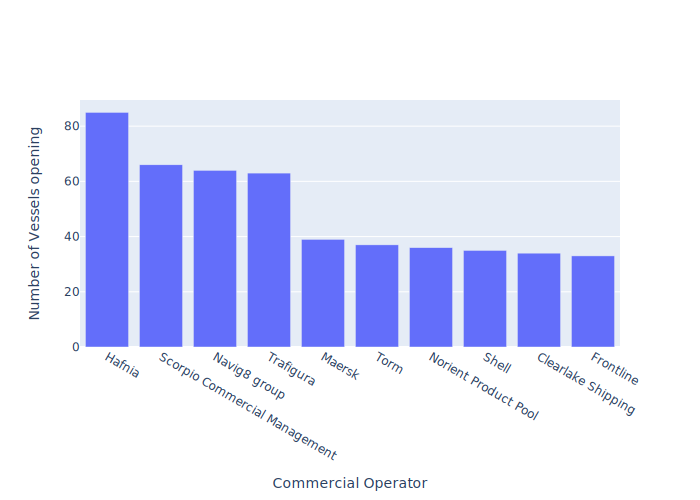

In [16]:
top_co_fig = go.Figure()

bar = go.Bar(
    x=top_co_df.CommercialOperator.tolist(),
    y=top_co_df.VesselCount.tolist(),
)

top_co_fig.add_trace(bar)
top_co_fig.update_xaxes(title_text="Commercial Operator")
top_co_fig.update_yaxes(title_text="Number of Vessels opening")
top_co_fig.show()

#### Vessels opening at specific ports

In this example, we will create a visualization, for the number of distinct vessels opening at specific ports per day over the next week

In [17]:
ports = [
    'Singapore',
    'Fujairah',
    'Rotterdam',
    'Gibraltar',
    'Galle',
]

this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')

Create the pivot table

In [18]:
ports_mask = data.open_name.isin(ports) & data.open_date_to.isin(this_week_days)

df_ports = data[ports_mask]

df_pivot = pd.pivot_table(
    df_ports,
    columns='open_name',
    index='open_date_to',
    values='imo',
    aggfunc=pd.Series.nunique,
    fill_value=0,
).reindex(index=this_week_days, fill_value=0).reset_index().rename(columns={'index': 'open_date_to'})

df_pivot

open_name,open_date_to,Fujairah,Galle,Gibraltar,Rotterdam,Singapore
0,2022-08-01 00:00:00+00:00,27,8,5,10,25
1,2022-08-02 00:00:00+00:00,3,3,1,5,11
2,2022-08-03 00:00:00+00:00,5,3,2,3,14
3,2022-08-04 00:00:00+00:00,4,2,2,5,15
4,2022-08-05 00:00:00+00:00,3,4,5,5,11
5,2022-08-06 00:00:00+00:00,3,1,3,5,11
6,2022-08-07 00:00:00+00:00,7,0,1,5,8


And display the results as timeseries

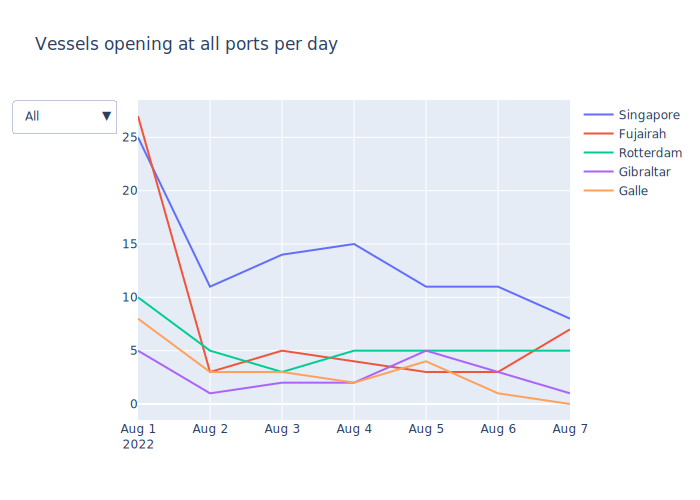

In [19]:
def port_button(port):
    args = [
        {'visible': [i == ports.index(port) for i in range(len(ports))]},
        {
            'title': f'Vessels opening at {port} per day',
            'showlegend': True
        },
    ]
    
    return dict(label=port,
          method='update',
          args=args,
        )

title = 'Vessels opening at all ports per day'

ports_fig = go.Figure()

port_buttons = []

for port in ports:
    if port not in df_pivot.columns:
        continue
    port_scatter_plot = go.Scatter(    
        x = df_pivot.open_date_to,
        y = df_pivot[port],
        name = port,
        mode='lines',
    )

    ports_fig.add_trace(port_scatter_plot)
    
    port_buttons.append(port_button(port))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(ports))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *port_buttons,
])

ports_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )]
)

ports_fig.show()

#### Export data to csv

In [20]:
output_path = '' # Change output_path with your path
filename = 'last_two_days_positions.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)